# Feature Selection

🎯 This exercise is a continuation of the previous one, in which you will perform ***feature selection***. 

👇 Run the cell below to load your preprocessed dataset.

In [1]:
import pandas as pd

# Run this cell if you 
data = pd.read_csv("../data-preprocessing-workflow/data/clean_dataset.csv")

data.head()

,GrLivArea,BedroomAbvGr,KitchenAbvGr,OverallCond,RoofSurface,CentralAir,SalePrice,Fin,NoGarage,RFn,Unf,sin_MoSold,cos_MoSold
0,0.380070,0.375,0.333333,0.500,0.316729,1.0,208500,0.0,0.0,1.0,0.0,0.500000,0.866025
1,-0.312090,0.375,0.333333,0.875,0.069650,1.0,181500,0.0,0.0,1.0,0.0,0.866025,-0.500000
2,0.497489,0.375,0.333333,0.500,0.228124,1.0,223500,0.0,0.0,1.0,0.0,-0.866025,-0.500000
3,0.390885,0.375,0.333333,0.500,0.442583,1.0,140000,0.0,0.0,0.0,1.0,0.500000,0.866025
4,1.134029,0.500,0.333333,0.500,0.566894,1.0,250000,0.0,0.0,1.0,0.0,-0.500000,0.866025


## (1) Correlation investigation

❓ Plot a heatmap of the ***Pearson Correlation*** between the columns of the dataset ❓

<AxesSubplot:>

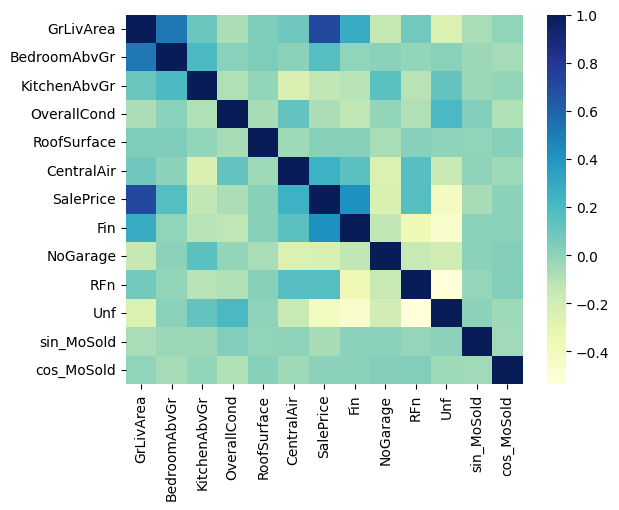

In [2]:
import seaborn as sns

corr = data.corr() # Pearson Correlation

# Heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,
        cmap= "YlGnBu")

❓ Visualize the correlation between column pairs in a dataframe ❓

In [6]:
corr_df = corr.unstack().reset_index()
corr_df.columns = ['feature_1','feature_2', 'correlation']

corr_df.sort_values(by="correlation",ascending=False, inplace=True) # sort by correlation

corr_df = corr_df[corr_df['feature_1'] != corr_df['feature_2']] # Remove self correlation

corr_df.head()

,feature_1,feature_2,correlation
6,GrLivArea,SalePrice,0.707685
78,SalePrice,GrLivArea,0.707685
1,GrLivArea,BedroomAbvGr,0.519712
13,BedroomAbvGr,GrLivArea,0.519712
85,SalePrice,Fin,0.419678


❓ How many pairs of features exceed a correlation of 0.9 or -0.9 ❓

*Save your answer as an integer under variable name `correlated_features`*

In [11]:
correlated_features = len(corr_df[(corr_df['correlation'] >= 0.9) | (corr_df['correlation'] <= -0.9)])
correlated_features

0

🧪 **Test your code**

In [12]:
from nbresult import ChallengeResult

result = ChallengeResult('correlation',
                         correlated_features = correlated_features
)

result.write()
print(result.check())


============================= test session starts ==============================
platform darwin -- Python 3.10.6, pytest-7.1.3, pluggy-1.0.0 -- /Users/bingobango/.pyenv/versions/tom/bin/python3
cachedir: .pytest_cache
rootdir: /Users/bingobango/code/lewagon/data-feature-selection/tests
plugins: anyio-3.6.1, asyncio-0.19.0
asyncio: mode=strict
collecting ... collected 1 item

test_correlation.py::TestCorrelation::test_correlated_features PASSED    [100%]

============================== 1 passed in 0.02s ===============================


💯 You can commit your code:

git add tests/correlation.pickle

git commit -m 'Completed correlation step'

git push origin master



## (2) Base Modelling

❓ Prepare the feature set `X` and target `y`. ❓

*Remember that we want to model the `SalePrice` with the preprocessed features.*

In [18]:
X = data.drop(columns=['SalePrice'])
y = data['SalePrice']

In [30]:
X

,GrLivArea,BedroomAbvGr,KitchenAbvGr,OverallCond,RoofSurface,CentralAir,Fin,NoGarage,RFn,Unf,sin_MoSold,cos_MoSold
0,0.380070,0.375,0.333333,0.500,0.316729,1.0,0.0,0.0,1.0,0.0,0.500000,8.660254e-01
1,-0.312090,0.375,0.333333,0.875,0.069650,1.0,0.0,0.0,1.0,0.0,0.866025,-5.000000e-01
2,0.497489,0.375,0.333333,0.500,0.228124,1.0,0.0,0.0,1.0,0.0,-0.866025,-5.000000e-01
3,0.390885,0.375,0.333333,0.500,0.442583,1.0,0.0,0.0,0.0,1.0,0.500000,8.660254e-01
4,1.134029,0.500,0.333333,0.500,0.566894,1.0,0.0,0.0,1.0,0.0,-0.500000,8.660254e-01
...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0.282735,0.375,0.333333,0.500,0.251267,1.0,0.0,0.0,1.0,0.0,-0.500000,-8.660254e-01
1456,0.940904,0.375,0.333333,0.625,0.459996,1.0,0.0,0.0,0.0,1.0,0.500000,8.660254e-01
1457,1.353418,0.500,0.333333,1.000,0.036147,1.0,0.0,0.0,1.0,0.0,0.866025,-5.000000e-01
1458,-0.596369,0.250,0.333333,0.625,0.648667,1.0,0.0,0.0,0.0,1.0,1.000000,6.123234e-17


❓ Cross validate a Linear Regression model ❓

*Save the score under variable name `base_model_score`.*

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

base_model_score = cross_val_score(LinearRegression(), X, y, cv=10).mean()
base_model_score

0.6459244694846491

🧪 **Test your code**

In [17]:
from nbresult import ChallengeResult

result = ChallengeResult('base_model',
                         score = base_model_score
)

result.write()
print(result.check())


============================= test session starts ==============================
platform darwin -- Python 3.10.6, pytest-7.1.3, pluggy-1.0.0 -- /Users/bingobango/.pyenv/versions/tom/bin/python3
cachedir: .pytest_cache
rootdir: /Users/bingobango/code/lewagon/data-feature-selection/tests
plugins: anyio-3.6.1, asyncio-0.19.0
asyncio: mode=strict
collecting ... collected 1 item

test_base_model.py::TestBase_model::test_base_model_score PASSED         [100%]

============================== 1 passed in 0.15s ===============================


💯 You can commit your code:

git add tests/base_model.pickle

git commit -m 'Completed base_model step'

git push origin master



## (3) Feature Permutation

❓ Perform a feature permutation  and rank the features by order of importance. ❓

In [20]:
import numpy as np
from sklearn.inspection import permutation_importance

In [21]:
model = LinearRegression().fit(X,y)

PERMUTATION IMMPORTANCE
1. Get a trained model.

2. Shuffle the values in a single column, make predictions using the resulting dataset. Use these predictions and the true target values to calculate how much the loss function suffered from shuffling. That performance deterioration measures the importance of the variable you just shuffled.

3. Return the data to the original order (undoing the shuffle from step 2). Now repeat step 2 with the next column in the dataset, until you have calculated the importance of each column.

In [27]:
permutation_score = permutation_importance(model, X, y, n_repeats=100)

In [29]:
importance_df = pd.DataFrame(np.vstack((X.columns, permutation_score.importances_mean)).T)
importance_df.columns=['feature','feature importance']
importance_df.sort_values(by="feature importance", ascending=False)
importance_df

,feature,feature importance
0,GrLivArea,1.001537
1,BedroomAbvGr,0.065028
2,KitchenAbvGr,0.020258
3,OverallCond,0.000193
4,RoofSurface,0.000052
5,CentralAir,0.016155
6,Fin,0.053585
7,NoGarage,0.011413
8,RFn,0.011371
9,Unf,0.021859


In [31]:
X.describe()

,GrLivArea,BedroomAbvGr,KitchenAbvGr,OverallCond,RoofSurface,CentralAir,Fin,NoGarage,RFn,Unf,sin_MoSold,cos_MoSold
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1.460000e+03
mean,0.078410,0.358305,0.348858,0.571918,0.508148,0.934932,0.241096,0.055479,0.289041,0.414384,0.177734,-3.052265e-01
std,0.813952,0.101972,0.073446,0.139100,0.291583,0.246731,0.427895,0.228992,0.453472,0.492784,0.664574,6.589302e-01
min,-2.263422,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000e+00
25%,-0.516802,0.250000,0.333333,0.500000,0.246143,1.000000,0.000000,0.000000,0.000000,0.000000,-0.500000,-8.660254e-01
50%,0.000000,0.375000,0.333333,0.500000,0.517523,1.000000,0.000000,0.000000,0.000000,0.000000,0.500000,-5.000000e-01
75%,0.483198,0.375000,0.333333,0.625000,0.761406,1.000000,0.000000,0.000000,1.000000,1.000000,0.866025,6.123234e-17
max,6.455002,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000e+00


❓ Which feature is the most important ❓

*Save your answer as a `string` under variable name `best_feature`.*

In [34]:
best_feature = 'GrLivArea'

🧪 **Test your code**

In [35]:
from nbresult import ChallengeResult

result = ChallengeResult('feature_permutation',
                         feature = best_feature
)

result.write()
print(result.check())


============================= test session starts ==============================
platform darwin -- Python 3.10.6, pytest-7.1.3, pluggy-1.0.0 -- /Users/bingobango/.pyenv/versions/tom/bin/python3
cachedir: .pytest_cache
rootdir: /Users/bingobango/code/lewagon/data-feature-selection/tests
plugins: anyio-3.6.1, asyncio-0.19.0
asyncio: mode=strict
collecting ... collected 1 item

test_feature_permutation.py::TestFeature_permutation::test_best_feature PASSED [100%]

============================== 1 passed in 0.04s ===============================


💯 You can commit your code:

git add tests/feature_permutation.pickle

git commit -m 'Completed feature_permutation step'

git push origin master



## (4) Modelling with less complexity

❓ Drop the weak features and cross-validate a new model ❓

* You should aim at maintaining a score close to the previous one. 
* Save the score under variable name `simplified_model_score`.

<details>
    <summary>💡 Hint</summary>
    
You can try dropping features one by one starting from the ones lowest importance until your model score starts dropping significantly.
</details>

In [36]:
X.columns

Index(['GrLivArea', 'BedroomAbvGr', 'KitchenAbvGr', 'OverallCond',
       'RoofSurface', 'CentralAir', 'Fin', 'NoGarage', 'RFn', 'Unf',
       'sin_MoSold', 'cos_MoSold'],
      dtype='object')

In [37]:
X = X.drop(columns=['cos_MoSold', 'sin_MoSold', 'Unf'])

In [38]:
model = LinearRegression()

scores = cross_val_score(model, X, y, cv=10)

simplified_model_score = scores.mean()

simplified_model_score

0.6468867065634258

🧪 **Test your code**

In [39]:
from nbresult import ChallengeResult

result = ChallengeResult('reduced_complexity_model',
                         model_score = simplified_model_score
)

result.write()
print(result.check())


============================= test session starts ==============================
platform darwin -- Python 3.10.6, pytest-7.1.3, pluggy-1.0.0 -- /Users/bingobango/.pyenv/versions/tom/bin/python3
cachedir: .pytest_cache
rootdir: /Users/bingobango/code/lewagon/data-feature-selection/tests
plugins: anyio-3.6.1, asyncio-0.19.0
asyncio: mode=strict
collecting ... collected 1 item

test_reduced_complexity_model.py::TestReduced_complexity_model::test_reduced_complexity_score PASSED [100%]

============================== 1 passed in 0.18s ===============================


💯 You can commit your code:

git add tests/reduced_complexity_model.pickle

git commit -m 'Completed reduced_complexity_model step'

git push origin master



P.S. Do you remember your score before preprocessing from Challenge #1? How is it different after preprocessing?

🏁 Congratulations! Now, you know a bit more how to do ***feature selection*** !

💾 Don't forget to git add/commit/push your notebook...

🚀 ... and move on to the next challenge!